<a href="https://colab.research.google.com/github/xseeker0/neural-scratchpad/blob/main/practice_1_plotting_prepare_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.12.12


# Trực quan hóa dữ liệu

## Figure and axes

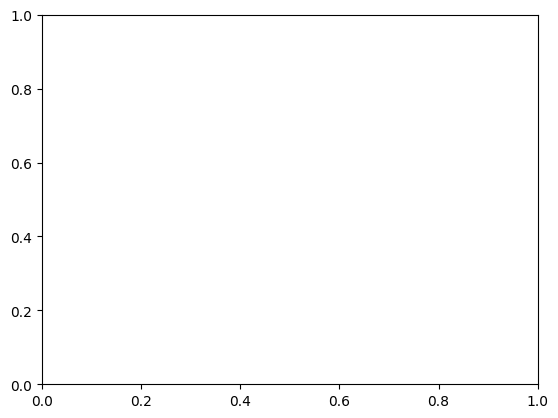

In [2]:
import matplotlib.pyplot as plt

# create a figure and a axes
fig, ax = plt.subplots()
plt.show()

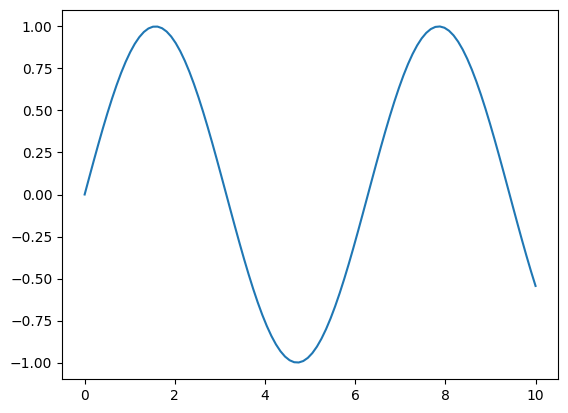

In [3]:
import numpy as np
# Prepare data (a line)
x = np.linspace(0, 10, 100)  # create 100 points
y = np.sin(x)
#
fig, ax = plt.subplots()
# plotting
ax.plot(x, y)
plt.show()

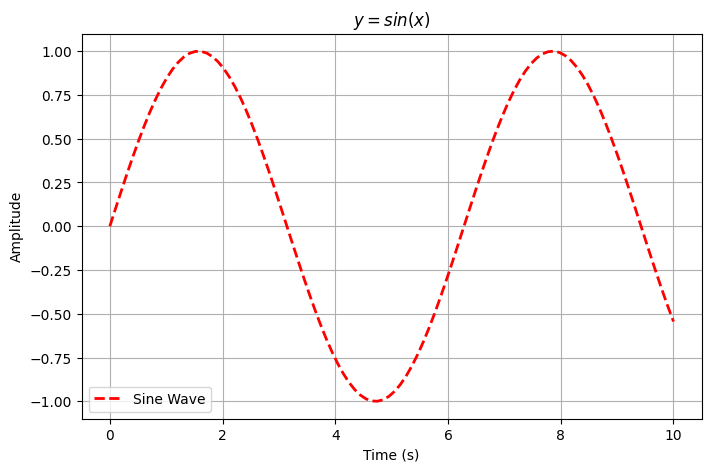

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

# Plotting style: red, dashed
ax.plot(x, y, color='red', linestyle='--', linewidth=2, label='Sine Wave')

# Title (Use set_...)
ax.set_title("$y = sin(x)$")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
# Show with grid and note
ax.grid(True)
ax.legend() # Show label='Sine Wave'

plt.show()

## Multi row/col

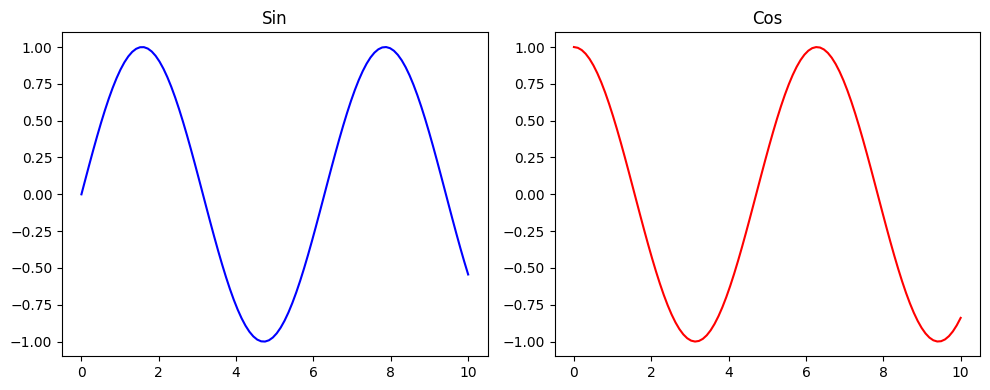

In [5]:
# Create 1 Figure include 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# ax1
x = np.linspace(0, 10, 100)
ax1.plot(x, np.sin(x), 'b')
ax1.set_title('Sin')

# ax2
ax2.plot(x, np.cos(x), 'r')
ax2.set_title('Cos')

plt.tight_layout() # auto align
plt.show()

## Image

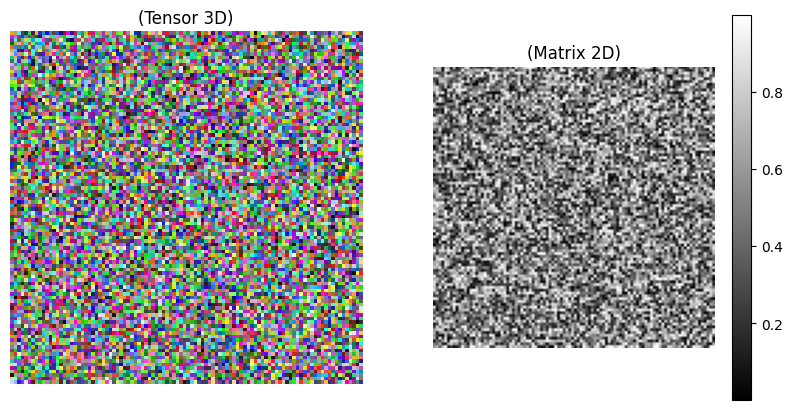

In [6]:
# (Synthetic Data)
# Random img 100x100 pixels
# Shape: (Height=100, Width=100, Channels=3)
random_rgb = np.random.rand(100, 100, 3)

# Random gray img 100x100 pixels
# Shape: (Height=100, Width=100)
random_gray = np.random.rand(100, 100)

#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(random_rgb)
ax1.set_title("(Tensor 3D)")
# turn of axis
ax1.axis('off')

# 2D img need 'cmap' (colormap)
# cmap='gray', default (viridis)
im = ax2.imshow(random_gray, cmap='gray')
# im = ax2.imshow(random_gray)
ax2.set_title("(Matrix 2D)")
ax2.axis('off')
# colorbar
plt.colorbar(im, ax=ax2)

plt.show()

# Pytorch

## **Tensor**

In [7]:
import torch
import numpy as np

# tensor
data = [[1, 2], [3, 4]]

x_data = torch.tensor(data)
print("From array")
print(x_data)

np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print("From numpy")
print(x_np)

shape = (2,3,)
rand_tensor = torch.rand(shape)
print("Random")
print(rand_tensor)

ones_tensor = torch.ones(shape)
print("Ones")
print(ones_tensor)

zeros_tensor = torch.zeros(shape)
print("Zeros")
print(zeros_tensor)

From array
tensor([[1, 2],
        [3, 4]])
From numpy
tensor([[1, 2],
        [3, 4]])
Random
tensor([[0.5600, 0.2547, 0.8417],
        [0.3470, 0.4603, 0.8499]])
Ones
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# infor of a tensor
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")



Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


## Operation

In [9]:
# Element-wise
print("Element-wise")
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[2, 2], [3, 4]])
print(f'a: {a}')
print(f'b: {b}')
ew1 = torch.mul(a, b)
print(ew1)
ew2 = a * b
print(ew2)
# Dot-product
print("Dot-product")
dp1 = torch.matmul(a, b)
print(dp1)
dp2 = a @ b
print(dp2)

# Autograd
print("Autograd")
# y = x^2 where x = 2
x = torch.tensor(2.0, requires_grad=True)
y = x**2
y.backward()
print(x.grad)

# Joining
print("Joining")
t1 = torch.cat([a, b], dim=0)
print(t1)
t2 = torch.cat([a, b], dim=1)
print(t2)

# Aggregation
print("Aggregation")
print(a.sum())
print(a.max())
print(a.argmax())
print(a.min())
print(a.argmin())

# View and permute
print("View and permute 2x3x4")
viewandpermute = torch.rand(2, 3, 4)
print(viewandpermute)
print("View")
print(viewandpermute.view(2, 12))
print("Permute")
print(viewandpermute.permute(2, 0, 1))


Element-wise
a: tensor([[1, 2],
        [3, 4]])
b: tensor([[2, 2],
        [3, 4]])
tensor([[ 2,  4],
        [ 9, 16]])
tensor([[ 2,  4],
        [ 9, 16]])
Dot-product
tensor([[ 8, 10],
        [18, 22]])
tensor([[ 8, 10],
        [18, 22]])
Autograd
tensor(4.)
Joining
tensor([[1, 2],
        [3, 4],
        [2, 2],
        [3, 4]])
tensor([[1, 2, 2, 2],
        [3, 4, 3, 4]])
Aggregation
tensor(10)
tensor(4)
tensor(3)
tensor(1)
tensor(0)
View and permute 2x3x4
tensor([[[0.9759, 0.3040, 0.0852, 0.4721],
         [0.8680, 0.4788, 0.6007, 0.3958],
         [0.9305, 0.0370, 0.1033, 0.2002]],

        [[0.4177, 0.9378, 0.5755, 0.6465],
         [0.8918, 0.0303, 0.6197, 0.0597],
         [0.7001, 0.4458, 0.3657, 0.3220]]])
View
tensor([[0.9759, 0.3040, 0.0852, 0.4721, 0.8680, 0.4788, 0.6007, 0.3958, 0.9305,
         0.0370, 0.1033, 0.2002],
        [0.4177, 0.9378, 0.5755, 0.6465, 0.8918, 0.0303, 0.6197, 0.0597, 0.7001,
         0.4458, 0.3657, 0.3220]])
Permute
tensor([[[0.9759, 0.8680,

# Dataset

## Practice with Cifar-10

### Dowload data

In [10]:
import numpy as np
import urllib.request
import pickle
import tarfile
import os
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Download data
url = 'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz'
if not os.path.exists('cifar-10-python.tar.gz'):
    urllib.request.urlretrieve(url, 'cifar-10-python.tar.gz')

#
if not os.path.exists('cifar-10-batches-py'):
    with tarfile.open('cifar-10-python.tar.gz', 'r:gz') as tar:
        tar.extractall()
    print("Extracted!")

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict[b'data'], dict[b'labels']

def visualize_cifar(images, labels, mean=None, std=None):
    print(f"Feature batch shape: {images.size()}")
    print(f"Labels batch shape: {labels.size()}")
    img = images[0].squeeze()  # Get the first image from the batch
    label = labels[0]

    # Denormalize image if mean and std are provided
    if mean is not None and std is not None:
        # Convert mean and std to tensors and reshape for broadcasting
        mean_tensor = torch.tensor(mean).view(3, 1, 1)
        std_tensor = torch.tensor(std).view(3, 1, 1)
        img = img * std_tensor + mean_tensor
        # Clip values to [0, 1] to avoid issues after denormalization
        img = torch.clamp(img, 0, 1)

    # Permute the image dimensions from (C, H, W) to (H, W, C) for matplotlib
    plt.imshow(img.permute(1, 2, 0))
    plt.show()
    print(f"Label: {label}")

path = 'cifar-10-batches-py'

/tmp/ipython-input-1673820782.py:18: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


Extracted!


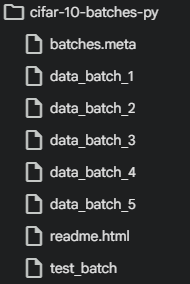

### In-memory approach

Load 50000 to RAM.
Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


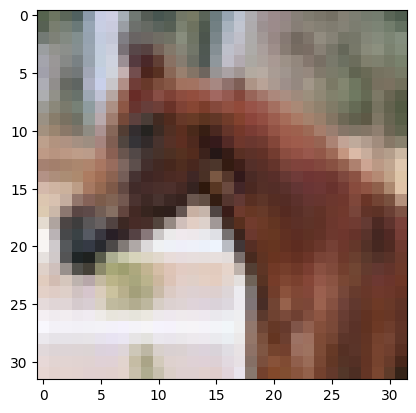

Label: 7


3366

In [11]:
# Method 1: Load all data to RAM
class CIFAR10InMemory(Dataset):
    def __init__(self, root_dir):
        all_data = []
        all_labels = []
        # CIFAR-10 have 5 training batch
        for i in range(1, 6):
            file_path = os.path.join(root_dir, f'data_batch_{i}')
            data, labels = load_cifar_batch(file_path)
            all_data.append(data)
            all_labels.extend(labels)

        # Reshape from (N, 3072) -> (N, 3, 32, 32) and normalize to [0, 1]
        self.data = torch.from_numpy(np.vstack(all_data)).float().view(-1, 3, 32, 32) / 255.0
        self.labels = torch.tensor(all_labels)
        print(f"Load {len(self.data)} to RAM.")

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

ds_memory = CIFAR10InMemory(path)
loader_memory = DataLoader(ds_memory, batch_size=64, shuffle=True, num_workers=0)

# Display image and label.
train_features, train_labels = next(iter(loader_memory))
visualize_cifar(train_features, train_labels)

import gc;del ds_memory;del loader_memory;gc.collect() # release memory


### On-the-fly approach

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


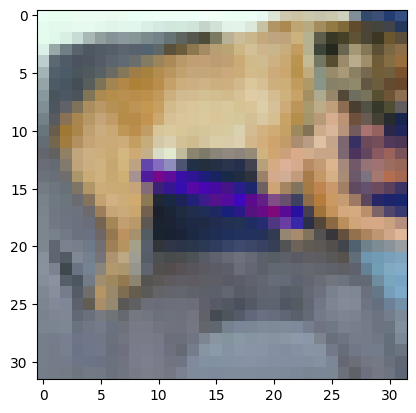

Label: 5


3339

In [12]:
# Method 2: On-the-fly
class CIFAR10OnTheFly(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.file_list = [os.path.join(root_dir, f'data_batch_{i}') for i in range(1, 6)]

        # Meta data
        self.indices = []
        for file_idx, file_path in enumerate(self.file_list):
            _, labels = load_cifar_batch(file_path)
            for img_idx in range(len(labels)):
                self.indices.append((file_idx, img_idx))

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        file_idx, img_inner_idx = self.indices[idx]
        file_path = self.file_list[file_idx]

        # In practice, this is typically Image.open(path)
        data, labels = load_cifar_batch(file_path)

        img = torch.from_numpy(data[img_inner_idx]).float().view(3, 32, 32) / 255.0
        label = labels[img_inner_idx]

        return img, label

ds_disk = CIFAR10OnTheFly(path)
loader_disk = DataLoader(ds_disk, batch_size=64, shuffle=True, num_workers=2, pin_memory=True)

# Display image and label.
train_features, train_labels = next(iter(loader_disk))
visualize_cifar(train_features, train_labels)

import gc;del ds_disk;del loader_disk;gc.collect() # release memory

### Data Augmentation

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


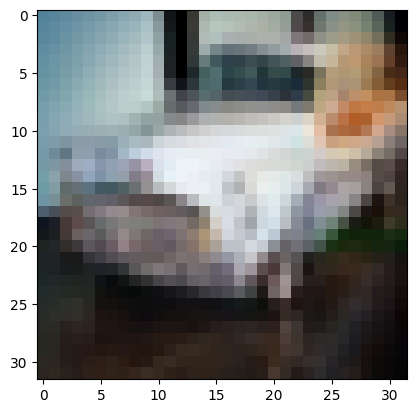

Label: 1


6229

In [13]:
import torchvision.transforms as T
from PIL import Image

class CIFAR10OnTheFlyAugmented(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.file_list = [os.path.join(root_dir, f'data_batch_{i}') for i in range(1, 6)]

        # Meta data
        self.indices = []
        for file_idx, file_path in enumerate(self.file_list):
            _, labels = load_cifar_batch(file_path)
            for img_idx in range(len(labels)):
                self.indices.append((file_idx, img_idx))

        self.transform = transform

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        file_idx, img_inner_idx = self.indices[idx]
        data, labels = load_cifar_batch(self.file_list[file_idx])
        img = data[img_inner_idx].reshape(3, 32, 32).transpose(1, 2, 0) # HWC for PIL

        # to PIL
        img = Image.fromarray(img.astype('uint8'))

        # Augment data on CPU
        if self.transform:
            img = self.transform(img)

        return img, labels[img_inner_idx]

# Transforms
CIFAR10_MEAN = (0.4914, 0.4822, 0.4465)
CIFAR10_STD = (0.2470, 0.2435, 0.2616)
train_transform = T.Compose([
    # T.RandomCrop(32, padding=4),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize(CIFAR10_MEAN, CIFAR10_STD),
])

# num_workers > 0
ds_disk = CIFAR10OnTheFlyAugmented(path, transform=train_transform)
loader = DataLoader(ds_disk, batch_size=64, shuffle=True, num_workers=2)

# Display image and label.
train_features, train_labels = next(iter(loader))
visualize_cifar(train_features, train_labels, mean=CIFAR10_MEAN, std=CIFAR10_STD)

import gc;del ds_disk;del loader;gc.collect() # release memory

### (OPTIONAL) Get image dataset infor mean and std

In [14]:
def get_mean_and_std(loader):
    sum_ = torch.tensor([0.0, 0.0, 0.0])
    sum_sq = torch.tensor([0.0, 0.0, 0.0])
    num_pixels = 0

    for data, _ in loader:
        # data shape: [Batch, Channels, Height, Width]
        batch_size = data.size(0)
        num_pixels += batch_size * 32 * 32

        # Sum of pixel values per channel
        sum_ += torch.sum(data, dim=[0, 2, 3])
        # Sum of squared pixel values per channel
        sum_sq += torch.sum(data**2, dim=[0, 2, 3])

    # Calculate mean and standard deviation
    mean = sum_ / num_pixels
    std = torch.sqrt((sum_sq / num_pixels) - mean**2)

    return mean, std

print("Mean and std CIFAR 10")

ds_memory = CIFAR10InMemory(path)
loader_memory = DataLoader(ds_memory, batch_size=64, shuffle=True, num_workers=0)
print(get_mean_and_std(loader_memory))

import gc;del ds_memory;del loader_memory;gc.collect()



Mean and std CIFAR 10
Load 50000 to RAM.
(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))


0